In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split(',')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

In [3]:
dataArr,labelArr = loadDataSet('linearly_separable.csv')

In [4]:
def plot_fit(datamatrix, labelmatrix):
    dataarray = np.asarray(datamatrix)
    n = dataarray.shape[0]

    # Keep track of the two classes in different arrays so they can be plotted later...
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelmatrix[i]) == 1:
            xcord1.append(dataarray[i, 0])
            ycord1.append(dataarray[i, 1])
        else:
            xcord2.append(dataarray[i, 0])
            ycord2.append(dataarray[i, 1])
    fig = plt.figure()

    # Plot the data as points with different colours
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=20, c='green')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(False)
    plt.show()

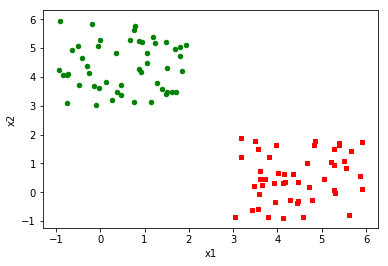

In [5]:
plot_fit(dataArr,labelArr)

### SVM

In [6]:
from svm_basic import svm_basic

dataMat, labelMat = loadDataSet('linearly_separable.csv')
svm_basic_instance = svm_basic()
svm = svm_basic_instance.fit(dataMat, labelMat)

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 1
fullSet, iter: 0 i:2, pairs changed 1
fullSet, iter: 0 i:3, pairs changed 1
fullSet, iter: 0 i:4, pairs changed 1
fullSet, iter: 0 i:5, pairs changed 2
j not moving enough
fullSet, iter: 0 i:6, pairs changed 2
fullSet, iter: 0 i:7, pairs changed 3
fullSet, iter: 0 i:8, pairs changed 3
fullSet, iter: 0 i:9, pairs changed 3
fullSet, iter: 0 i:10, pairs changed 3
L==H
fullSet, iter: 0 i:11, pairs changed 3
fullSet, iter: 0 i:12, pairs changed 3
fullSet, iter: 0 i:13, pairs changed 3
j not moving enough
fullSet, iter: 0 i:14, pairs changed 3
fullSet, iter: 0 i:15, pairs changed 3
fullSet, iter: 0 i:16, pairs changed 3
fullSet, iter: 0 i:17, pairs changed 3
L==H
fullSet, iter: 0 i:18, pairs changed 3
fullSet, iter: 0 i:19, pairs changed 3
fullSet, iter: 0 i:20, pairs changed 3
fullSet, iter: 0 i:21, pairs changed 3
fullSet, iter: 0 i:22, pairs changed 3
fullSet, iter: 0 i:23, pairs changed 3
fullSet, iter: 0 i:24, p

In [7]:
def showPlot(svm):  
    train_x = np.mat(svm.X)  
    # draw all samples  
    for i in range(svm.m):  
        if svm.labelMat[i] == -1:  
            plt.plot(train_x[i, 0], train_x[i, 1], 'or')  
        elif svm.labelMat[i] == 1:  
            plt.plot(train_x[i, 0], train_x[i, 1], 'ob')  
  
    min_x = min(train_x[:, 0])[0, 0]  
    max_x = max(train_x[:, 0])[0, 0]  
    y_min_x = float(-svm.b - svm.w[0] * min_x) / svm.w[1]  
    y_max_x = float(-svm.b - svm.w[0] * max_x) / svm.w[1]  
    plt.plot([min_x, max_x], [y_min_x, y_max_x]) 
    plt.show()  

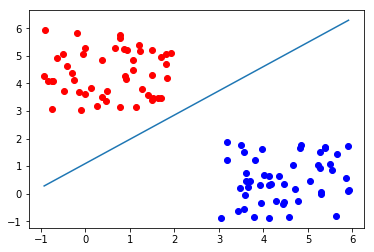

In [8]:
showPlot(svm)

### Test

In [14]:
import random
def gen_test_file(n, filename):
    index = random.sample(range(0, 100),n)
    index.sort()

    i= 0
    with open(filename,'w') as output , open('linearly_separable.csv') as input:
        for line in input :
            if i in index:
                output.writelines(line)
                output.flush()
            i+=1
        output.close()
        input.close()

In [16]:
filename = 'test_file.csv'
gen_test_file(30, filename)

In [17]:
dataMat_test, labelMat_test = loadDataSet(filename)

hypotheses = svm_basic_instance.predict(dataMat_test)

In [18]:
def accuracy(predicts, labels):
    errorCount = 0
    for i in range(len(predicts)):
        if np.sign(predicts[i]) != np.sign(labels[i]):
            errorCount += 1
    print("Accuracy is : ", 1-float(errorCount)/len(predicts))

In [19]:
accuracy(hypotheses, labelMat_test)

Accuracy is :  1.0
